In [149]:
import os
from keras.preprocessing import image
import cv2
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split as TTS
import pickle
haar=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
import random
from numpy.random import randint

In [150]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping as ES
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

In [151]:
data=[]
categories=["Humans"]
for i in categories:
    path=os.path.join("Face_class",i)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        data.append(img)

In [152]:
data_Human=[]
for image in data:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(gray)
    for i,j,w,h in co_ord:
        if co_ord!=():
            image=image[j:j+h,i:i+w]
            image=cv2.resize(image,(224,224))
            data_Human.append(image)

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_5308\2926082587.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():


In [153]:
data_Human_1=[]
for image in data_Human:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(gray)
    for i,j,w,h in co_ord:
        if co_ord!=():
            image=image[j:j+h,i:i+w]
            image=cv2.resize(image,(224,224))
            data_Human_1.append([image,0])

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_5308\92595885.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():


In [154]:
cap=cv2.VideoCapture(0)
data_aryan=[]
while len(data_aryan)<300:
    ret,frame=cap.read()
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(frame1)
    max_co_ord=[]
    index_co_ord=None
    for i,j,w,h in co_ord:
        if co_ord!=():
            max_co_ord.append(abs((w+i)-i)+abs((h+j)-j))
    if co_ord!=():
        index_co_ord=max_co_ord.index(max(max_co_ord))
        x_=co_ord[index_co_ord][0]
        y_=co_ord[index_co_ord][1]
        w_=co_ord[index_co_ord][2]
        h_=co_ord[index_co_ord][3]
        cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,255,0),1)
        frame_1=frame[y_:h_+y_,x_:x_+w_]
        frame_1=cv2.resize(frame_1,(224,224))
        data_aryan.append([frame_1,1])
    cv2.putText(frame,str(len(data_aryan)),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_5308\2668493450.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():
C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_5308\2668493450.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():


In [155]:
data_Human_1.extend(data_aryan)

In [156]:
random.shuffle(data_Human_1)

In [157]:
X=[]
Y=[]
for i,j in data_Human_1:
    X.append(i)
    Y.append(j)

In [158]:
x=np.array(X)
y=np.array(Y)

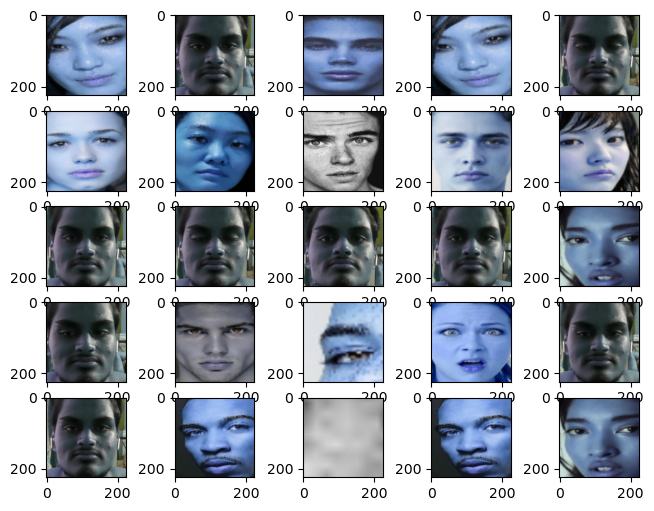

In [159]:
f,a=mp.subplots(5,5,figsize=(8,6))
c=0
for i in range(5):
    for j in range(5):
        c=random.randint(2,100)
        a[i][j].imshow(x[c,:,:])

In [160]:
VGG=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
    
)
VGG.trainable=False

In [161]:
for i in VGG.layers:
    print(i.name,"=",i.trainable)

input_4 = False
block1_conv1 = False
block1_conv2 = False
block1_pool = False
block2_conv1 = False
block2_conv2 = False
block2_pool = False
block3_conv1 = False
block3_conv2 = False
block3_conv3 = False
block3_pool = False
block4_conv1 = False
block4_conv2 = False
block4_conv3 = False
block4_pool = False
block5_conv1 = False
block5_conv2 = False
block5_conv3 = False
block5_pool = False


In [162]:
for i in VGG.layers:
    if "block5" in i.name:
        i.trainable=True

In [163]:
for i in VGG.layers:
    print(i.name,"=",i.trainable)

input_4 = False
block1_conv1 = False
block1_conv2 = False
block1_pool = False
block2_conv1 = False
block2_conv2 = False
block2_pool = False
block3_conv1 = False
block3_conv2 = False
block3_conv3 = False
block3_pool = False
block4_conv1 = False
block4_conv2 = False
block4_conv3 = False
block4_pool = False
block5_conv1 = True
block5_conv2 = True
block5_conv3 = True
block5_pool = True


In [164]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [165]:
model=Sequential()

model.add(VGG)

model.add(Flatten())

model.add(Dense(40,activation="relu"))

model.add(Dense(20,activation="relu"))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_24 (Dense)            (None, 40)                1003560   
                                                                 
 dense_25 (Dense)            (None, 20)                820       
                                                                 
 dense_26 (Dense)            (None, 1)                 21        
                                                                 
Total params: 15,719,089
Trainable params: 1,004,401
Non-trainable params: 14,714,688
_________________________________________________________________


In [166]:
model_1=Sequential()

model_1.add(VGG)

model_1.add(Flatten())

model_1.add(Dense(60,activation="relu"))

model_1.add(Dense(30,activation="relu"))

model_1.add(Dense(1,activation="sigmoid"))
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_27 (Dense)            (None, 60)                1505340   
                                                                 
 dense_28 (Dense)            (None, 30)                1830      
                                                                 
 dense_29 (Dense)            (None, 1)                 31        
                                                                 
Total params: 16,221,889
Trainable params: 1,507,201
Non-trainable params: 14,714,688
_________________________________________________________________


In [167]:
model_2=Sequential()

model_2.add(VGG)

model_2.add(Flatten())

model_2.add(Dense(50,activation="relu"))

model_2.add(Dense(30,activation="relu"))

model_2.add(Dense(1,activation="sigmoid"))
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 25088)             0         
                                                                 
 dense_30 (Dense)            (None, 50)                1254450   
                                                                 
 dense_31 (Dense)            (None, 30)                1530      
                                                                 
 dense_32 (Dense)            (None, 1)                 31        
                                                                 
Total params: 15,970,699
Trainable params: 1,256,011
Non-trainable params: 14,714,688
_________________________________________________________________


In [168]:
es=ES(monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,)

In [169]:
model.compile(optimizer="adamax",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])
model_1.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])
model_2.compile(optimizer="rmsprop",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

In [170]:
def rand_data():
    r=randint(0,len(x)-1,[int(len(x)/3)])
    return r
r=rand_data()
x1=x[r,:,:,:]
y1=y[r]

r1=rand_data()
x2=x[r1,:,:,:]
y2=y[r1]

r2=rand_data()
x3=x[r2,:,:,:]
y3=y[r2]

In [171]:
datagen = IDG(featurewise_center=True,fill_mode="constant",featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,validation_split=0.2)

In [172]:
v=datagen.flow(x, y, batch_size=32,subset='training')
vis=v.next()
visual=np.array(vis[0])

C:\Users\AryanBr0\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\AryanBr0\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [173]:
visual.shape

(32, 224, 224, 3)

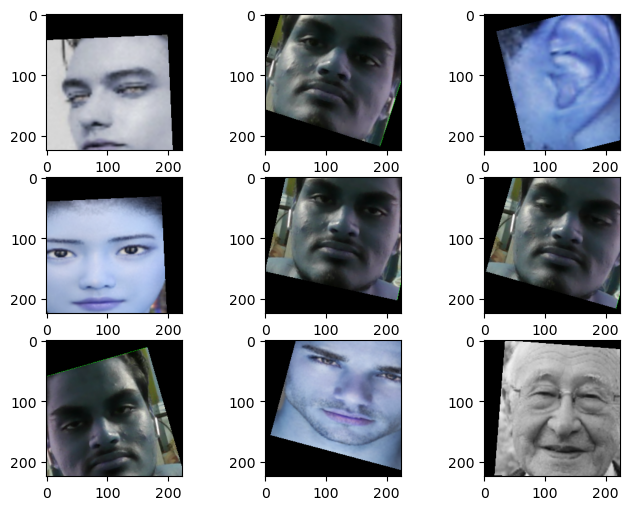

In [174]:
f,a=mp.subplots(3,3,figsize=(8,6))
c=0
for i in range(3):
    for j in range(3):
        c=c+i+j
        a[i][j].imshow(visual[c,:,:,:].astype('uint8'))

In [175]:
datagen.fit(x1)
history=model.fit(datagen.flow(x1, y1, batch_size=16,subset='training'),validation_data=datagen.flow(x1, y1,batch_size=6, subset='validation'), epochs=2,callbacks=es)

Epoch 1/2
17/17 [==============================] - 19s 1s/step - loss: 0.2419 - accuracy: 0.9015 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 2/2
17/17 [==============================] - 19s 1s/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000


In [176]:
datagen.fit(x2)
history=model_1.fit(datagen.flow(x2, y2, batch_size=16,subset='training'),validation_data=datagen.flow(x2, y2,batch_size=6, subset='validation'), epochs=2,callbacks=es)

Epoch 1/2
17/17 [==============================] - 20s 1s/step - loss: 0.3779 - accuracy: 0.8371 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 2/2
17/17 [==============================] - 19s 1s/step - loss: 0.0194 - accuracy: 0.9886 - val_loss: 4.6184e-04 - val_accuracy: 1.0000


In [177]:
datagen.fit(x3)
history=model_2.fit(datagen.flow(x3, y3, batch_size=16,subset='training'),validation_data=datagen.flow(x3, y3,batch_size=6, subset='validation'), epochs=2,callbacks=es)

Epoch 1/2
17/17 [==============================] - 19s 1s/step - loss: 0.7466 - accuracy: 0.8106 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 2/2
17/17 [==============================] - 19s 1s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000


In [178]:
#pickle.dump(model, open("Face_Recognition.pkl", 'wb'))
#pickle.dump(model_1, open("Face_Recognition_1.pkl", 'wb'))
#pickle.dump(model_2, open("Face_Recognition_2.pkl", 'wb'))

In [36]:
model = pickle.load(open("Face_Recognition.pkl", 'rb'))
model_1 = pickle.load(open("Face_Recognition_1.pkl", 'rb'))
model_2 = pickle.load(open("Face_Recognition_2.pkl", 'rb'))

In [179]:
def prediction(frame):
    pred=[0,0]
    I1=int(model_1.predict(frame)>0.5)
    pred[I1]=pred[I1]+I1

    I2=int(model.predict(frame)>0.5)
    pred[I2]=pred[I2]+I2

    I3=int(model_2.predict(frame)>0.5)
    pred[I2]=pred[I2]+I2
    return pred.index(max(pred))

In [188]:
cap=cv2.VideoCapture(0)
data_aryan=[]
while len(data_aryan)<250:
    ret,frame=cap.read()
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(frame1)
    max_co_ord=[]
    index_co_ord=None
    for i,j,w,h in co_ord:
        if co_ord!=():
            max_co_ord.append(abs((w+i)-i)+abs((h+j)-j))
    if co_ord!=():
        index_co_ord=max_co_ord.index(max(max_co_ord))
        x_=co_ord[index_co_ord][0]
        y_=co_ord[index_co_ord][1]
        w_=co_ord[index_co_ord][2]
        h_=co_ord[index_co_ord][3]
        #cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,255,0),1)
        frame_1=frame[y_:h_+y_,x_:x_+w_]
        frame_1=cv2.resize(frame_1,(224,224))
        if prediction(frame_1.reshape(1,224,224,3))==1:
            cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,255,0),1)
            cv2.putText(frame,"UnLock",(x_,y_),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)
        else:
            cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,0,255),1)
            cv2.putText(frame,"Lock",(x_,y_),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
    else:
        cv2.putText(frame,"Face Not Found",(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 91ms/step


C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_5308\3414344395.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():
C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_5308\3414344395.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():


1/1 [==============================] - 0s 99ms/step
